# PA3 Document Clustering on CORA:
by William Downing, Nathan Ansah, and Martin Nguyen

# Data pulling and cleaning:

We imported pandas and NumPy, and other imports for graphical representation and prediction scores. We store our primary data set into a variable and use that variable to read the data sets with additional parameters to apply column names to another variable. This block cleans up and formats the data set into a more readable data table.


In [2728]:
# import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()
from sklearn.preprocessing import StandardScaler

f_edges = './cora.cites'
f_nodes = './cora.content'
V = 1433
word_col_names = ['w{}'.format(i) for i in range(V)]
df_nodes = pd.read_csv(f_nodes, sep= '\t', header = None, names=['pid'] + word_col_names + ['lbl'])
Y = df_nodes[word_col_names].to_numpy()
Y


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Adjacency Matrix Data pulling and viewing:

 Pulls the columns of data into a declared variable named df_edges, and when displayed, it will show a table with all the rows and the target and source columns. Although for our project the accuracy, nmi, and ari were better without it.

In [2729]:
df_edges = pd.read_csv(f_edges, sep='\t', header = None, names=["target", "source"])
# df_edges["label"] = "cites"
df_edges
    
#Transpose the matrix
#mulitply against the PCA matrix and then kMeans it


,target,source
0,35,1033
1,35,103482
2,35,103515
3,35,1050679
4,35,1103960
...,...,...
5424,853116,19621
5425,853116,853155
5426,853118,1140289
5427,853155,853118


# Creation of edge Adjacency Matrix:

This is where we build the adjacency matrix. Using a for loop, we iterate through all the rows in df_edges from the previous data set output. Whatever value is currently on the counter “i” will take the value of that target column and source column of that row and increment it by 1 every time into the new adjacency matrix to represent that another document is calling on it as an adjacent document. This new adjacency matrix now has rows representing the target paper id and columns representing the source with the new increments as their values.


In [2730]:
edge_id = [_ for _ in df_nodes['pid']]
adj = pd.DataFrame(index = edge_id, columns = edge_id)
adj = adj.fillna(0)

for i in df_edges.iterrows():
    adj.loc[i[1][0]][i[1][1]] += 1


adj

,31336,1061127,1106406,13195,37879,1126012,1107140,1102850,31349,1106418,...,626531,1131180,1130454,1131184,1128974,1128975,1128977,1128978,117328,24043
31336,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1061127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Transposing the Matrix:

In this block, we transpose the adjacency matrix and put it into a declared variable named adj_T to contain the new adjacency matrix that’s been transposed. 


In [2731]:
adj_T = adj.T
# scaler = StandardScaler()
# adj_T = scaler.fit_transform(adj_T)
adj_T 

,31336,1061127,1106406,13195,37879,1126012,1107140,1102850,31349,1106418,...,626531,1131180,1130454,1131184,1128974,1128975,1128977,1128978,117328,24043
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1061127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1128978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Applying StandardScaler onto Main Data:

Here, we apply the StandardScaler method, which cleans up the data by setting a “standard” so that all the values don’t outweigh one another, where some will have a bigger weight than the others but should be treated equal, so the results aren’t skewed from specific values that outweigh the rest. The reason why it was beneficial for us to apply standardization is because each column in our matrix was being treated as a different entity when they should have been treated as all the same. That allows for further PCA processing and K-means to not overlook columns and have better accuracy when determining their cluster.


In [2732]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(Y)

# Applying PCA to Scaled Data:

In this block, the PCA method contains two parameters; the first is the number of dimensions for reducing the columns to a smaller size, and the second is setting the random state to control the random number generator used for shuffling. PCA is applied to the already standardly scaled data, and would perform dot product with the adjacency matrix but is not needed for our code and the newly segmented PCA data. 


In [2733]:
pca = PCA(7, random_state = 20) #20 was 6
scores = pca.fit_transform(segmentation_std)
# final_scores = np.dot(adj_T, scores)
# scores = final_scores

# Applying First Kmeans with fitting mean and variance: 

In this block, we apply the K-means to fit the score to produce the clusterings, which we get from the last block, with 7 clusters with 12 random states and 325 iterations into the K-means clustering.


In [2734]:
from sklearn.cluster import KMeans
# model = KMeans(n_clusters = 7, random_state = 178)

# df = pd.merge(df, pca_df, right_index= True, left_index = True)
# model.fit(X)

kmeans_pca = KMeans(n_clusters = 7, init = 'k-means++', random_state = 12)

kmeans_pca.fit(scores)

y_hat = kmeans_pca.labels_


# Applying Second Kmeans and predicting scores:

We applied K-means again because it assisted with producing a better clustering, and this time we used fit_predict to compute the cluster centers and predict what the cluster index is for every sample. We also set the labels into the y_hat variable.


In [2735]:
kmeans_pca = KMeans(n_clusters = 7, init = 'k-means++', random_state = 178) #178 or 202

kmeans_pca.fit_predict(scores)

y_hat = kmeans_pca.labels_


# Showing unique labels:

This prints the unique labels of the K-means clustering

In [2736]:
np.unique(kmeans_pca.labels_)

array([0, 1, 2, 3, 4, 5, 6])

# Creation of true variables and projected variables, and the ID mapping:

The y variable is our projected outcome, which has all the true variables and what we’re comparing off of, and y_idx is the actual label.
We create the dictionary for each label and set it to the y_mapping variable.


In [2737]:
y, y_idx = pd.factorize(df_nodes['lbl'])
y_mapping = {y_idx[k]: k for k in range(7)}
y_mapping

{'Neural_Networks': 0,
 'Rule_Learning': 1,
 'Reinforcement_Learning': 2,
 'Probabilistic_Methods': 3,
 'Theory': 4,
 'Genetic_Algorithms': 5,
 'Case_Based': 6}

# Bincount amount:

We use bincount to determine the amount from each cluster contained in the y_hat variable.


In [2738]:
np.bincount(y_hat)

array([ 349, 1039,  101,  543,   73,   31,  572], dtype=int64)

# Label Mapping and Predicting:

This is where label mapping happens. The calculation/guessing gets mapped to its predictive cluster. After that, it predicts the labels in the array, and the order depends on how accurate it will be. Preferably, we would want it to be in the order of the unique label, but it can also result in some inaccuracies where multiple of the same labels are inputted into the array (ie, [1,1]).


In [2739]:
lbl_mapping = [-1] * 7
for k in y_mapping:
    masked_labels = kmeans_pca.labels_
    best_cls = np.argmax(
        np.bincount(
            y_hat[y==y_mapping[k]]
        )/np.bincount(y_hat)
    )
    lbl_mapping[y_mapping[k]] = best_cls

# Predicted Scores mapping:

This is used to display how the mapping went and to see if we need to go back to readjust anything.


In [2740]:
lbl_mapping

[1, 5, 3, 4, 6, 0, 3]

# Accuracy Check:

We assess how accurate our results were by taking in the Hungarian mapping and obtaining all the true outcomes mapped into the data and checking for every value in y that can be found in mapping how accurate it is to y_hat to produce an accuracy score.


In [2741]:
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score as acc

hungarian = []
for k in range(7):
   hungarian.append(np.bincount(y_hat[y==k]))
_, hg_mapping = linear_sum_assignment(hungarian, maximize=True)

acc([hg_mapping[i] for i in y], y_hat)

0.5317577548005908

# NMI and ARI Check:

We use the prebuilt libraries to check y and y_hat for their NMI and ARI scores.


In [2742]:
from sklearn.metrics import normalized_mutual_info_score as nmi
from sklearn.metrics import adjusted_rand_score as ari

for m, m_name in ((nmi, 'NMI'), (ari, 'ARI')):
    print(f'{m_name}: {m(y,y_hat):.3f}')
    

NMI: 0.308
ARI: 0.284


# Results Concating and formatting:

In this part, it attaches the new scores to the old data frame and then proceeds to put the column values 1-7 based on their clusterings and adds an extra column for their labels, and prints their head.


In [2743]:
df_segm_pca_kmeans = pd.concat([df_nodes.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
df_segm_pca_kmeans.columns.values[-7: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_segm_pca_kmeans.head()

,pid,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w1432,lbl,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Segment K-means PCA
0,31336,0,0,0,0,0,0,0,0,0,...,0,Neural_Networks,3.125470,1.477492,-0.140625,-1.377635,0.486488,-0.467287,1.177685,1
1,1061127,0,0,0,0,0,0,0,0,0,...,0,Rule_Learning,-0.848031,0.227599,-1.127567,0.855796,-0.424259,-0.040475,0.127068,3
2,1106406,0,0,0,0,0,0,0,0,0,...,0,Reinforcement_Learning,-3.160196,1.832130,-0.696485,-2.926494,0.131356,0.212325,-2.376982,3
3,13195,0,0,0,0,0,0,0,0,0,...,0,Reinforcement_Learning,-1.118173,0.494399,-4.048838,-3.233639,-2.759197,-1.562553,-2.956762,3
4,37879,0,0,0,0,0,0,0,0,0,...,0,Probabilistic_Methods,2.650562,-0.624835,-1.178962,0.428171,-0.320962,1.052747,1.073789,6


# Data Scatterplot graphing: 

Creates a segment column that takes in a mapping of all seven clusterings and adds a naming convention and sets up the axes, and plots the data according to the segment columns.
(NOTE: the clusters are labeled first - seventh, but in the data they show as 0-6)

C:\Users\Wllmd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Component 2', ylabel='Component 1'>

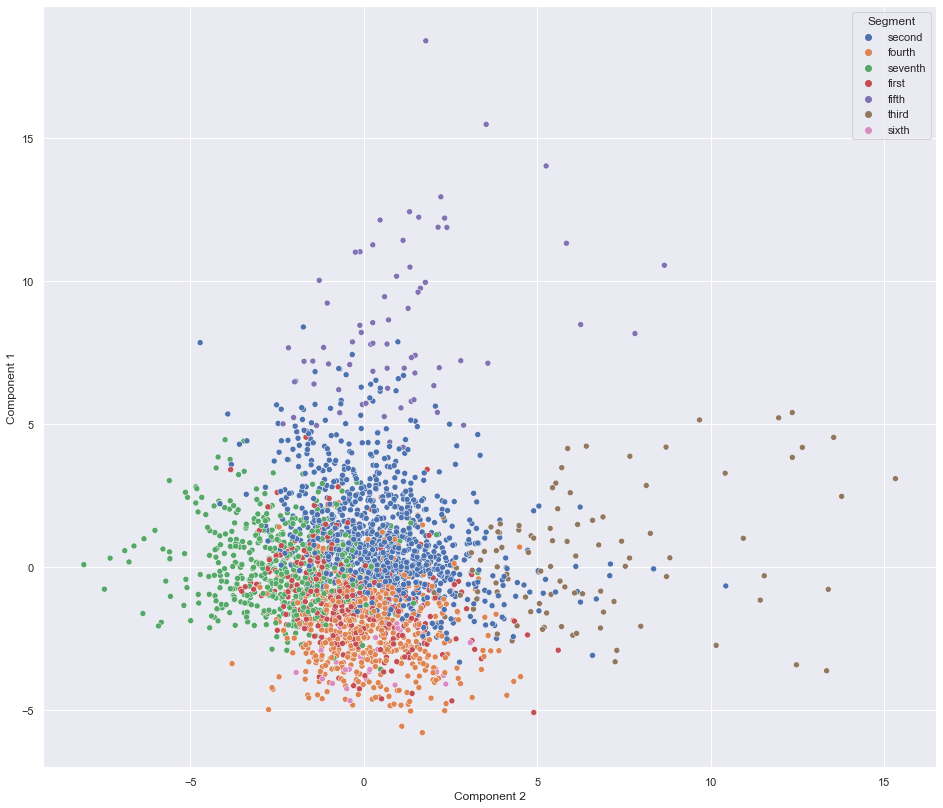

In [2744]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first',
                                                                             1: 'second',
                                                                             2: 'third',
                                                                             3: 'fourth',
                                                                             4: 'fifth',
                                                                             5: 'sixth',
                                                                             6: 'seventh'})

x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']

plt.figure(figsize = (16, 14))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'])